In [3]:
import dash_html_components as html
import dash_core_components as dcc
import dash
import plotly.graph_objects as go
from sklearn.neighbors import DistanceMetric
import umap
import yaml
import hdbscan
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from scipy.spatial.distance import yule
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from typing import Dict, List, Union
import pandas as pd
import lib_spotify_app as lib
import numpy as np
from pathlib import Path
import spotipy
import json
from pprint import pprint
from IPython.display import display

import dill

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')


pd.set_option('max_columns', None)
pd.reset_option('max_rows')



In [4]:
df: pd.DataFrame = pd.read_csv(Path('private', 'df_analysis.csv'),
                               index_col=0)

col_to_convert = ['track.artists.0.genres', 'track.artists.0.supergenres']
df[col_to_convert] = df[col_to_convert].applymap(yaml.safe_load)


In [12]:

col_analysis = [
    'track.id.danceability',
    'track.id.energy',
    'track.id.key',
    'track.id.loudness',
    'track.id.mode',
    'track.id.speechiness',
    'track.id.acousticness',
    'track.id.instrumentalness',
    'track.id.liveness',
    'track.id.valence',
    'track.id.tempo',
    'track.id.time_signature',
]

# def hdbscan_fit_transform(min_cluster_size, df):
#     mdl = hdbscan.HDBSCAN(
#         min_cluster_size=20,
#         metric='mahalanobis',
#         V=df.cov(),
#         gen_min_span_tree=True)

#     df_output = mdl.fit_predict(df)
#     # mdl.minimum_spanning_tree_.plot()
#     # mdl.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
#     return df_output

# mdl_tsne = TSNE(metric=DistanceMetric.get_metric('mahalanobis',
#                                                 V=df_analysis.cov()))\
#                 .fit_transform(df[col_analysis])


df[['tsne_x', 'tsne_y']] = pd.DataFrame(TSNE(perplexity=30, learning_rate=600)\
                                        .fit_transform(df[col_analysis]))

df[['umap_x', 'umap_y']] = pd.DataFrame(umap\
                                .UMAP(n_neighbors=15, metric='mahalanobis')\
                                .fit_transform(df[col_analysis]))

for algo in ['tsne', 'umap']:
    df[f'clusters_{algo}'] = hdbscan.HDBSCAN(min_cluster_size=20)\
                                    .fit_predict(df[[f'{algo}_x', f'{algo}_y']])
    
    df[f'clusters_{algo}'] = df[f'clusters_{algo}'].apply(
        lambda x: f'c{x}'
    )


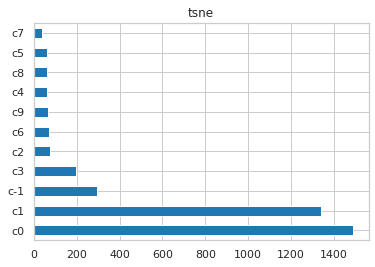

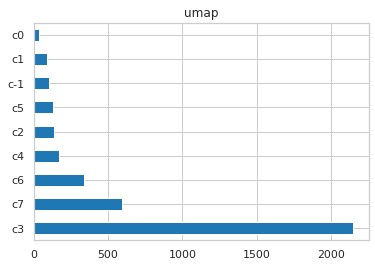

In [13]:
for algo in ['tsne', 'umap']:
    plt.figure()
    df[f'clusters_{algo}'].value_counts()\
                          .plot(kind='barh')\
                          .set_title(algo)

    # plt.figure()
    # df[f'clusters_{algo}'].hist().set_title(algo)


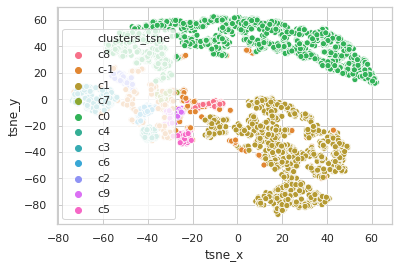

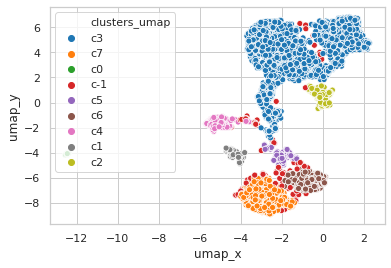

In [14]:
for algo in ['tsne', 'umap']:
    plt.figure()
    sns.scatterplot(f'{algo}_x', f'{algo}_y',
                    data=df,
                    hue=f'clusters_{algo}')


In [15]:
for algo in ['tsne', 'umap']:
    plt.figure()
    sns.pairplot(df,
                 kind='scatter',
                 diag_kind='hist',
                 corner=True,
                 vars=col_analysis + [f'{algo}_x', f'{algo}_y'],
                 hue=f'clusters_{algo}')
    plt.savefig(Path('private', f'pairplot_{algo}.png'),
                bbox_inches = 'tight')
    plt.close()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>